# Decision Tree Regression

In the [previous post](http://www.javahabit.com/2019/02/10/part-6-ml-svr/) we learnt about Support vector regression. In this post we will see a new way of deciphering information using a simple format of traversing conditions.

**Business Goal**: Can you spot the king? The people of *Falkland* are scared. Their king disguises as common man and roam amog them to gain knowledge about his kingdom and see if his polcies are working in his kingdom. When the king is disguised, the common people don't recognize him. If they accidently mistreat the king when he is disguised, they get punished. Can you help the people of *Falkland* spot the king? 

### How to get dataset?
- Decision Tree dataset
- Decision tree notebook

### What is a 'Decision Tree'?
![decsionTree](resources/img/decision/decisionTree.PNG)

>Decision tree is set of 'yes' or 'no' flow, which cascades downward like an upside down tree. For example, given a set of independenct varibale or features about a person, can we find if the person is healthy.  

![sampleTree.PNG](resources/img/decision/sampleTree.PNG)


### Parts of decision Tree
- Each decision point is called a **Node**. Ex - __Age < 30__
- Each connector is called an __Edge__.
- Each node which does not have any subnode is called a __Leaf__. Ex - __Fit__ or __Unfit!__.

### How is the tree built?
To build a tree, we need to start with an *Independent Feature* as root node. The possible attributes or unique values of that feature form the edges. Once the first level of tree is completed, attach another feature node at the end of each node and traverse deeper. Once you have exhausted all the features, you will arrive at the dependent value or result.

### Can we just start with any random feature as root node?
This is a million $$$ question here. This is meat of the whole algorithm. Let's look at our business problem about the problem that people of *Falkland* are facing. We need to come up with a solution to spot the king when he is disguised to save the common man from mistreating him accidently and hence punished in return. Here's the data that we have collected about people leaving the castle.
![falkland.PNG](resources/img/decision/falkland.PNG)

> Ok! So we have the data, but how do we find out which feature will be the root node?   

Going back to our previous [post](http://www.javahabit.com/2019/02/10/part-5-ml-mltr-backward-elimination/) on [__Backward Elimination__](http://www.javahabit.com/2019/02/10/part-5-ml-mltr-backward-elimination/), we can gather that root node should be a feature which is most important feature in making the decision. To find the most important feature, we will align each independent feature with dependent feature (*Is_King*).

![featuremap.PNG](resources/img/decision/featuremap.PNG)
![featureMap2.PNG](resources/img/decision/featureMap2.PNG)


If we look at the above mapping, we will see that **Gold_Tooth** feature is right most of the time in predicting the king, followed by **castle** as it has least number of false positive. 

> Well that's good to know, but I noticed that you did talk about the last two features - __Greedy__ and __Slow__.  

Yes, the distinction between the two is difficult to figure out. Both __Greedy__ and __Slow__ features have equal number of false positives. To understand, which feature is more important than the other, we need to understand __Data Entropy___.

### What is Data Entropy?
Entropy means how many times information chnaged that we got the positive result. Imagine if the king never left the castle, which means that all the information that we collected will show __Is_King__ as **0**. In our case, the entropy is **1** because, anybody could be the king. If we just had **Castle** as the feature, predicting the king would be difficult without other piece of information. 
>So in simple terms __Entropy is how many pieces of data point(*Independent feature*) are required, to guess the *Dependent variable* - *Is_King*__

![falklandResult.PNG](resources/img/decision/falklandResult.PNG)

To further explain. Let's say that instead of starting with **Gold_tooth** as root node, we start with **castle**, we will see that we are able to find the king only __3/10__ times. On top of that the left side gives very poor results. Just __1/5__ or __20%__. 

There is another problem with the above tree. It is too over complicated and is **overfitted**. If we get a new data the accuracy of our model could fall drastically.

Going back to our learning in [earlier post](http://www.javahabit.com/2019/02/10/part-5-ml-mltr-backward-elimination/), simpler model should be preferred over complicated model to avoid overfitting.

### How to avoid overfitting in decision Tree?  
Just remember the 3 golden rules to avoid overfitting:

1. Use smaller number of datapoints to build the tree. Ex - 10% datapoints is a goo dplace to build a generic model.

2. Do not go over board with the depth of the tree. A tree depth should only be increased of there is a significant improvement in the prediction.

3. Stop, if number of datapoints at the split is less than 5%.

Here's a refined version of the tree.

![refinedTree.PNG](resources/img/decision/refinedTree.PNG)

### Would this model work on non-categorical or continous values?
Absoluletly!! The splitting rules would still apply as I mentioned above. 

![spli1.PNG](resources/img/decision/spli1.PNG)

So each Split is a leaf node above. Imagine if we wanted to find the dependent variable __Y__ whose independent partners __X1__ and __X2__ are __10__ and __150__, then it would land in first node as __300.5__.

> I get why it landed in first leaf node position but where did we get value **300.5**?  
The value 300.5 is the average of all the datapoints in that box.  

> **Pay attention and read the previous 2 lines again.** The last two line will help you understand why we need to divide it into different leaves and nodes. If you do not have splits, then the only option is to take the average of the **ALL** the datapoints!! The accuracy would be nowhere close to your expectation and would be same all values of X1 and X2.


![split2.PNG](resources/img/decision/split2.PNG)

### Python Implementation
We are going to take a standard dataset called IRIS Dataset
>“The Iris flower dataset or Fisher’s Iris dataset is a multivariate dataset introduced by the British statistician and biologist Ronald Fisher in his 1936 paper ‘The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis’.” — Wikipedia

In layman terms it is a set of datapoints about IRIS flower where we have the information about length and width of sepals and petals about 3 varities.

![iris.PNG](resources/img/decision/iris.PNG)

__Step 1 :__ Get the common imports

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
dataset = pd.read_csv("iris.csv")

__Step 2:__ Identify the missing data


In [2]:
dataset.isnull().any()

sepal-length    False
sepal-width     False
petal-length    False
petal-width     False
species         False
dtype: bool

**Step 3:** Describe the data and identify the data types


In [3]:
dataset.describe()


,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


![iris-describe.PNG](resources/img/decision/iris-describe.PNG)

In [4]:
dataset.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
species          object
dtype: object

![iris_sample.PNG](resources/img/decision/iris_sample.PNG)

__Step 4 :__ Load the Iris data and create the X and Y variables

In [5]:

X= dataset.iloc[0:, 0:4].values
Y = dataset.iloc[:,4]

**Step 5:** Plot the data

<Figure size 432x288 with 0 Axes>

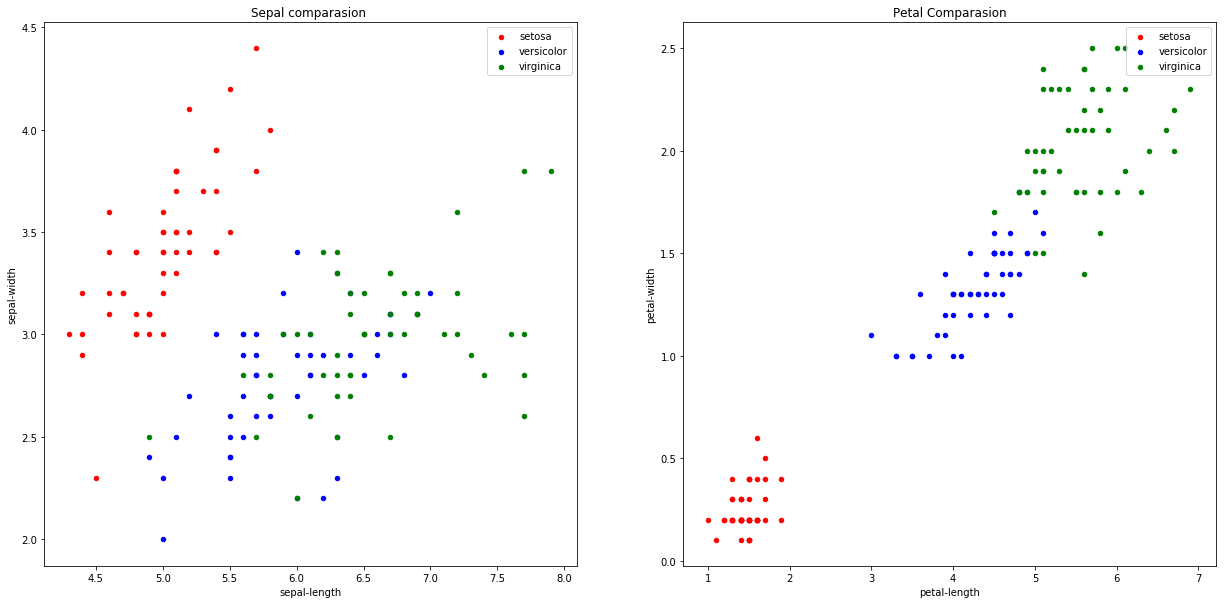

In [6]:


##Get the dataset for each of the three species
setosa=dataset[dataset['species']=='Iris-setosa']
versicolor =dataset[dataset['species']=='Iris-versicolor']
virginica =dataset[dataset['species']=='Iris-virginica']

#Create an empty figure with two windows pf size 21 by 10
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

#Plot each species using Sepal length and width on x-y axis
setosa.plot(x="sepal-length", y="sepal-width", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="sepal-length",y="sepal-width",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="sepal-length", y="sepal-width", kind="scatter", ax=ax[0], label='virginica', color='g')

#Plot each species using Petal length and width on x-y axis
setosa.plot(x="petal-length", y="petal-width", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="petal-length",y="petal-width",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="petal-length", y="petal-width", kind="scatter", ax=ax[1], label='virginica', color='g')

#Give Each figure its names
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

#Show the plot
plt.show()



![iris-plot.PNG](resources/img/decision/iris-plot.PNG)

**Step 6:** Encode the value of Flower types
The values of dependent variabale needs to be encoded to numbers as they are categorical values

In [7]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
Y = labelEncoder_y.fit_transform(Y)


**Step 7:** Split the data in train and test set

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

**Step 8:** Train the Decision Tree model
    

In [9]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

**Step 9:** Predict and score the model


In [10]:
y_predict=regressor.predict(x_test)

print(regressor.score(x_test,y_test))

1.0


> Wow! Did we just predict that our model is correct 100% of the time?  
The reason the accuracy is showing 100% is that our model is too complex as we did not define the maximum depth of tree and hence we broke a cardinal rule. Let's take a look at the created tree. 

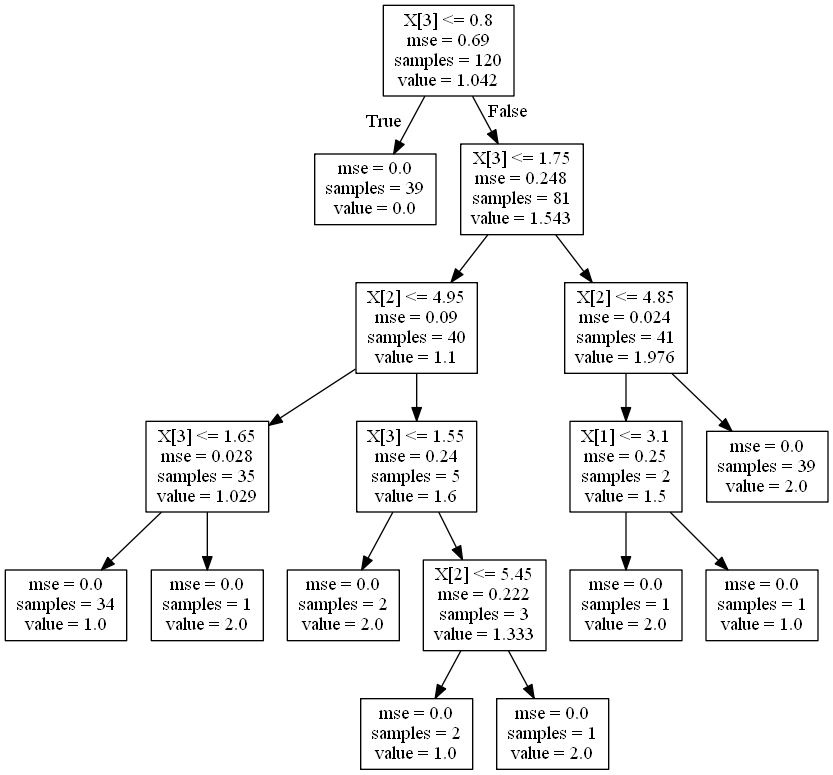

In [11]:
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

dot_data = StringIO()  
tree.export_graphviz(regressor, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

![tree.PNG](resources/img/decision/tree.PNG)

As you can see, that since we did not provide a maximum depth of tree, it created a complex tree of 6 layers and hence for our model we are getting 100% accuracy. This means that the model is an **overfitted model**.

Let's fix this by creating a simpler model.

In [24]:
#Creating a model that is only 2 layers deep by setting max_depth=3
regressor = DecisionTreeRegressor(random_state=0,criterion='mse', splitter='best', max_depth=3, min_samples_split=3, min_samples_leaf=2 )
regressor.fit(x_train, y_train)

y_predict=regressor.predict(x_test)

print(regressor.score(x_test,y_test))

0.9739827477382705


> As you can see that the model is not an overfit anymore and still gives us pretty good accuracy of __97.4%__.  
Looking at the decision tree now.


from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

dot_data = StringIO()  
tree.export_graphviz(regressor, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

![tree_fix.PNG](resources/img/decision/tree_fix.PNG)


So keep climbing the tree of success with this DecisionTree resression model. In the next series we will see how to use a kin of decision tree called Random forest regression.